In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

tar: : Couldn't visit directory: No such file or directory
tar: Error exit delayed from previous errors.


In [2]:
df = pd.read_csv(r"C:\Users\palla\OneDrive\Documents\demo_data\5.outlier.csv",header=None)

In [3]:
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


In [4]:
df.shape

(600, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


<AxesSubplot:xlabel='0', ylabel='1'>

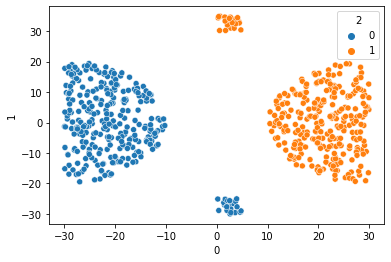

In [6]:
sns.scatterplot(x=0,y=1,hue=2,data=df)

## Split the data into train and test 

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[[0,1]],df[2],test_size=0.1)

In [4]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [5]:
#Standardization
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

## Build the neural networks

In [10]:
model = Sequential()
model.add(Dense(5,activation='sigmoid',input_dim=2))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________


In [12]:
# complie model
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,batch_size=10,epochs=500,validation_split=0.2)

C:\Users\palla\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/500
44/44 [==============================] - 1s 11ms/step - loss: 0.7003 - accuracy: 0.4769 - val_loss: 0.6882 - val_accuracy: 0.5278
Epoch 2/500
44/44 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4769 - val_loss: 0.6868 - val_accuracy: 0.5278
Epoch 3/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.4769 - val_loss: 0.6860 - val_accuracy: 0.5278
Epoch 4/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.4769 - val_loss: 0.6855 - val_accuracy: 0.5278
Epoch 5/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.4861 - val_loss: 0.6850 - val_accuracy: 0.5278
Epoch 6/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.6366 - val_loss: 0.6844 - val_accuracy: 0.7407
Epoch 7/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.7731 - val_loss: 0.6836 - val_accuracy: 0.7870
Epoch 8/500


Epoch 59/500
44/44 [==============================] - 0s 4ms/step - loss: 0.5597 - accuracy: 1.0000 - val_loss: 0.5544 - val_accuracy: 1.0000
Epoch 60/500
44/44 [==============================] - 0s 4ms/step - loss: 0.5540 - accuracy: 1.0000 - val_loss: 0.5486 - val_accuracy: 1.0000
Epoch 61/500
44/44 [==============================] - 0s 4ms/step - loss: 0.5482 - accuracy: 1.0000 - val_loss: 0.5425 - val_accuracy: 1.0000
Epoch 62/500
44/44 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 1.0000 - val_loss: 0.5362 - val_accuracy: 1.0000
Epoch 63/500
44/44 [==============================] - 0s 4ms/step - loss: 0.5358 - accuracy: 1.0000 - val_loss: 0.5301 - val_accuracy: 1.0000
Epoch 64/500
44/44 [==============================] - 0s 5ms/step - loss: 0.5293 - accuracy: 1.0000 - val_loss: 0.5236 - val_accuracy: 1.0000
Epoch 65/500
44/44 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 1.0000 - val_loss: 0.5165 - val_accuracy: 1.0000
Epoch 

44/44 [==============================] - 0s 3ms/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 174/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 1.0000
Epoch 175/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 1.0000
Epoch 176/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 1.0000
Epoch 177/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 178/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 1.0000
Epoch 179/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 1.0000 - val_loss: 0.0471 - val_accuracy: 1.0000
Epoch 180/500

44/44 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 288/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 289/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 290/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 291/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 292/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 293/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epoch 294/500

44/44 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 402/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 403/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 404/500
44/44 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 405/500
44/44 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 406/500
44/44 [==============================] - 0s 4ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 1.0000
Epoch 407/500
44/44 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 408/500

In [14]:
y_cap= model.predict(X_test_trans)

2/2 [==============================] - 0s 8ms/step


In [15]:
y_cap_f = np.where(y_cap>0.5,1,0)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_cap_f)

1.0

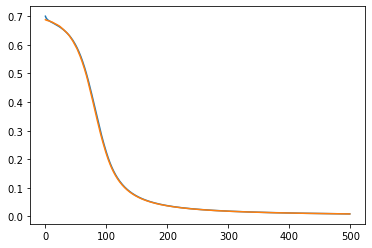

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [15]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

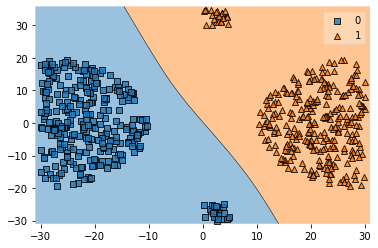

In [19]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

In [20]:
y_cap_f

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

3888/3888 [==============================] - 6s 2ms/step


<AxesSubplot:>

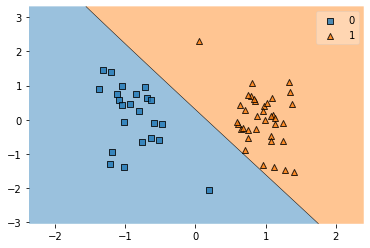

In [21]:
plot_decision_regions(X_test_trans,y_test.values.astype(int),clf=model)